In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd

In [14]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Find last date in teh database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Last Date :", last_date)

Last Date : ('2017-08-23',)


In [24]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date :", query_date)

Query Date : 2016-08-23


In [25]:
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
for record in data:
    print(record)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-04-10', 0.01)
('2017-04-11', 0.03)
('2017-04-12', 0.11)
('2017-04-13', 0.59)
('2017-04-14', 2.3)
('2017-04-15', 0.38)
('2017-04-16', 0.47)
('2017-04-17', 1.04)
('2017-04-18', 2.03)
('2017-04-19', 0.02)
('2017-04-20', 0.05)
('2017-04-21', 1.74)
('2017-04-22', 1.58)
('2017-04-23', 0.06)
('2017-04-24', 0.01)
('2017-04-25', 0.0)
('2017-04-26', 0.02)
('2017-04-27', 0.19)
('2017-04-28', 0.76)
('2017-04-29', 0.37)
('2017-04-30', 1.04)
('2017-05-01', 0.13)
('2017-05-02', 0.01)
('2017-05-03', 0.01)
('2017-05-04', 0.0)
('2017-05-05', 0.0)
('2017-05-06', 0.0)
('2017-05-07', 0.02)
('2017-05-08', 0.73)
('2017-05-09', 1.58)
('2017-05-10', 0.2)
('2017-05-11', 0.12)
('2017-05-12', 0.02)
('2017-05-13', 0.12)
('2017-05-14', 0.17)
('2017-05-15', 0.09)
('2017-05-16', 0.03)
('2017-05-17', 0.07)
('2017-05-18', 0.13)
('2017-05-19', 0.01)
('2017-05-20', 0.02)
('2017-05-21', 0.01)
('2017-05-22', 0.06)
('2017-05-23', 0.06)
('2017-05-24', 0.3)
('2017-05-25', 0.2)
('2017-05-26', 0.0)
('2017-05-27', 0.0)
('

In [35]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
climatedf = pd.DataFrame(data,columns = ["Date", "prcp"])
climatedf.set_index("Date", inplace=True)
climatedf = climatedf.sort_values(["Date"])
climatedf.head(50)

,prcp
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


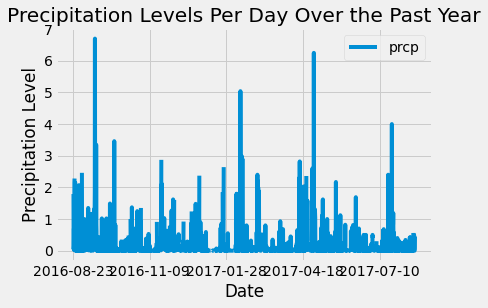

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = climatedf.plot();
ax.set_title("Precipitation Levels Per Day Over the Past Year");
ax.set_ylabel("Precipitation Level");


In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climatedf.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [40]:
# Design a query to show how many stations are available in this dataset?
count_stations = session.query(Station).group_by(Station.station).count()
count_stations

9

In [41]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#assign most active station
most_active_station=session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()
most_active= most_active_station[0]
most_active

#lowest temp, highest temp and average temp at the most active station
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active).all()


[(54.0, 85.0, 71.66378066378067)]

In [47]:
# Choose the station with the highest number of temperature observations.
# Query 
most_active_data =  session.query(Measurement.date,Measurement.tobs).\
                    filter(Measurement.station == most_active).\
                    filter(Measurement.date >= query_date).all()
most_active_data

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [52]:
#put into dataframe
temp_df = pd.DataFrame(most_active_data)
temp_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


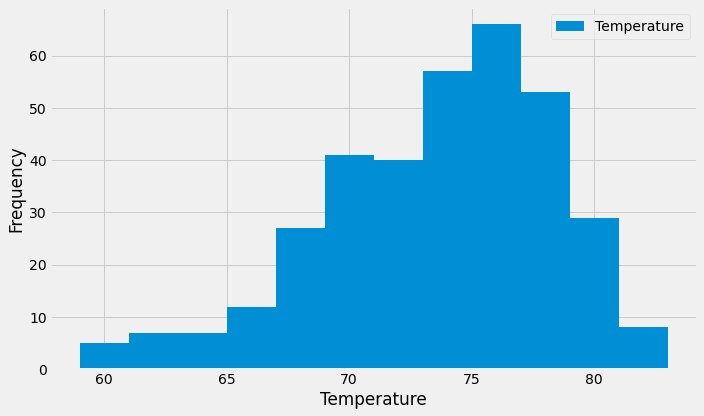

In [57]:
#Plot histogram with 12 bins
plt.figure(figsize=(10,6))
plt.hist(temp_df["tobs"], bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend(["Temperature"])
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [58]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [59]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

temps = calc_temps('2017-02-28', '2017-03-05')
temps

[(64.0, 72.02777777777777, 78.0)]

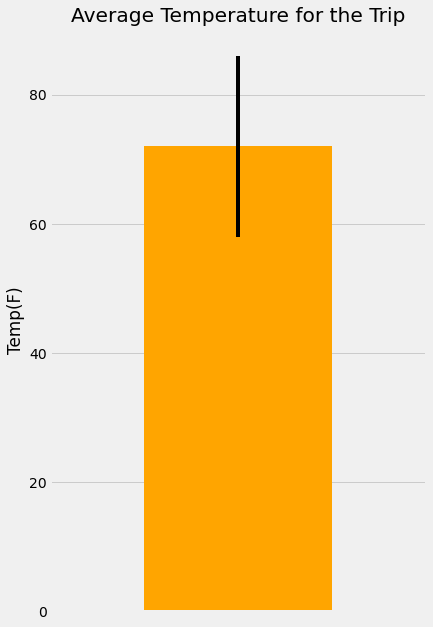

<Figure size 432x288 with 0 Axes>

In [62]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# create the dataframe
df = pd.DataFrame(temps, columns=["t_min", "t_avg", "t_max"])

# plot the average temp 
plt.figure(figsize=(6,10))
ax=df["t_avg"].plot.bar(yerr=(df["t_max"]-df["t_min"]), color="orange")
plt.title("Average Temperature for the Trip")
plt.ylabel("Temp(F)")
ax.axes.get_xaxis().set_visible(False)
plt.show()

# Save the plot
plt.tight_layout()
plt.savefig("output/avg_temp.png")
plt.show()


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [63]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [1]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-02-28'
end_date = '2017-03-05'

# Use the start and end date to create a range of dates
trip_dates = ["2018-02-28", "2018-03-01", "2018-03-02", "2018-03-03", "2018-03-04", "2018-03-05"]

# Strip off the year and save a list of %m-%d strings
date_list =[date.strftime(date, "%Y-%m-%d") for date in trip_dates]
date_list
dates = [date.strftime("%m-%d") for date in date_list]
dates
# Loop through the list of %m-%d strings and calculate the normals for each date


AttributeError: 'str' object has no attribute 'strftime'

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
